In [61]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [ ]:
# 武汉 15 天气温

In [48]:
url = 'http://www.weather.com.cn/weather15d/101200101.shtml'
requests.get(url).content.decode('utf-8')

'<!DOCTYPE html>\r\n<html>\r\n<head>\r\n<link rel="dns-prefetch" href="http://i.tq121.com.cn">\r\n<meta charset="utf-8" />\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n<title>武汉天气预报,武汉7天天气预报,武汉15天天气预报,武汉天气查询</title>\r\n<meta http-equiv="Content-Language" content="zh-cn">\r\n<meta name="keywords" content="武汉天气,whtq,天气预报,天气预报一周,天气预报15天,天气预报15天查询,天气预报40天,天气预报查询一周,天气预报一周天气,气象预报,气象云图,空气质量,空气质量指数,空气质量预报,空气质量实时监控,空气质量实时监测,空气质量监控,空气质量监测,空气预报" />\r\n<meta name="description" content="提供【武汉天气预报】,一周,15天查询,40天查询,气象云图,空气质量,天气实况,温度,降水,风力,气压,紫外线等及时准确发布,是中央气象台唯一权威天气发布平台,出行的好伴侣" />\r\n<style>\r\n    \r\n\r\n        .xyn-weather-box {\r\n            width: 354px;\r\n            height: 261px;\r\n            border: 1px solid #c2e5ff;\r\n            background: #fff;\r\n            position: absolute;\r\n            top: -67px;\r\n            left: 250px;\r\n            z-index: 999999;\r\n            display: none;\r\n        }\r\n\r\n        .xyn-weather-box h2 {\r\n      

In [49]:
url = 'http://www.weather.com.cn/weather15d/101200101.shtml'
soup = BeautifulSoup(str(requests.get(url).content.decode('utf-8')), 'html.parser')
soup

<!DOCTYPE html>

<html>
<head>
<link href="http://i.tq121.com.cn" rel="dns-prefetch"/>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>武汉天气预报,武汉7天天气预报,武汉15天天气预报,武汉天气查询</title>
<meta content="zh-cn" http-equiv="Content-Language"/>
<meta content="武汉天气,whtq,天气预报,天气预报一周,天气预报15天,天气预报15天查询,天气预报40天,天气预报查询一周,天气预报一周天气,气象预报,气象云图,空气质量,空气质量指数,空气质量预报,空气质量实时监控,空气质量实时监测,空气质量监控,空气质量监测,空气预报" name="keywords">
<meta content="提供【武汉天气预报】,一周,15天查询,40天查询,气象云图,空气质量,天气实况,温度,降水,风力,气压,紫外线等及时准确发布,是中央气象台唯一权威天气发布平台,出行的好伴侣" name="description"/>
<style>
    

        .xyn-weather-box {
            width: 354px;
            height: 261px;
            border: 1px solid #c2e5ff;
            background: #fff;
            position: absolute;
            top: -67px;
            left: 250px;
            z-index: 999999;
            display: none;
        }

        .xyn-weather-box h2 {
            border-bottom: 1px solid #e5ebef;
            height: 34px;
            lin

In [64]:
def extractLowHighTemperature(text: str):
    temperatures = re.compile('\d+').findall(text)
    return [int(temperature) for temperature in temperatures]

extractLowHighTemperature('26℃/16℃')

[26, 16]

In [93]:
data = []
for eleLi in soup.find('div', {'class': 'c15d'}).find_all('li'):
    temperatures = extractLowHighTemperature(eleLi.find('span', {'class': 'tem'}).getText())
    day = eleLi.find('span', {'class': 'time'}).getText()
    data.append([
        day,
        eleLi.find('span', {'class': 'wea'}).getText(),
        temperatures[1],
        temperatures[0],
    ])
df = pd.DataFrame(data, columns=['Day', 'Weather', 'Low Temperature', 'High Temperature'])

df.set_index(df['Day'], inplace=True)
del df['Day']
df

,Weather,Low Temperature,High Temperature
Day,,,
周五（11日）,晴转阴,16,26
周六（12日）,多云转雨,10,22
周日（13日）,雨,7,10
周一（14日）,阴转晴,8,13
周二（15日）,阴,8,16
周三（16日）,晴转阴,12,17
周四（17日）,阴,12,19
周五（18日）,阴,11,18


<class 'int'> Weather             晴转阴
Low Temperature      16
High Temperature     26
Name: 周五（11日）, dtype: object
<class 'int'> Weather             多云转雨
Low Temperature       10
High Temperature      22
Name: 周六（12日）, dtype: object
<class 'int'> Weather              雨
Low Temperature      7
High Temperature    10
Name: 周日（13日）, dtype: object
<class 'int'> Weather             阴转晴
Low Temperature       8
High Temperature     13
Name: 周一（14日）, dtype: object
<class 'int'> Weather              阴
Low Temperature      8
High Temperature    16
Name: 周二（15日）, dtype: object
<class 'int'> Weather             晴转阴
Low Temperature      12
High Temperature     17
Name: 周三（16日）, dtype: object
<class 'int'> Weather              阴
Low Temperature     12
High Temperature    19
Name: 周四（17日）, dtype: object
<class 'int'> Weather              阴
Low Temperature     11
High Temperature    18
Name: 周五（18日）, dtype: object


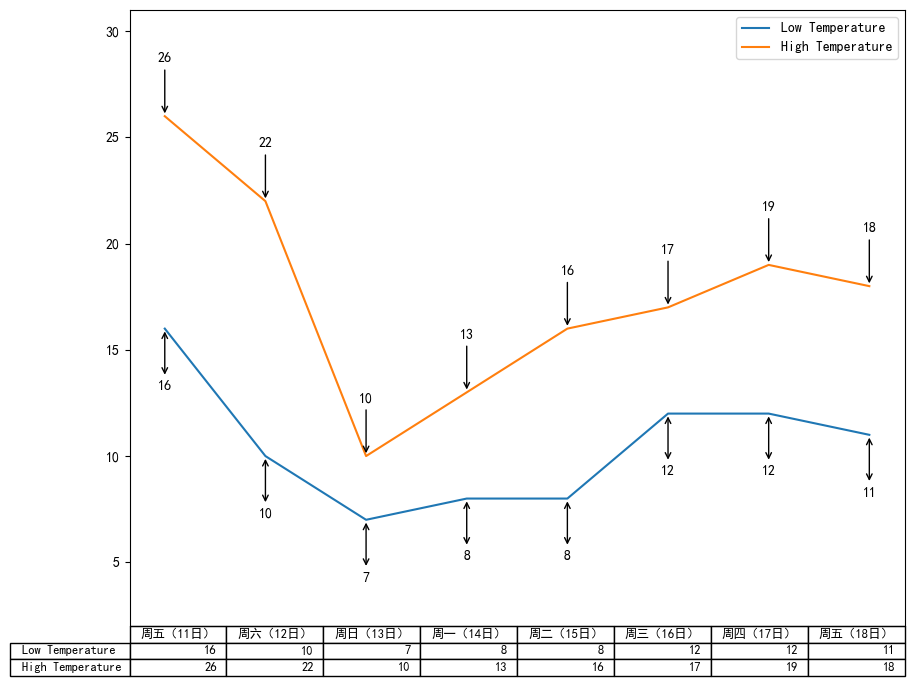

In [119]:
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = df.plot(kind='line', rot=-45, ylim=[df['Low Temperature'].min() - 5, df['High Temperature'].max() + 5], table=True, xticks=[], xlabel='', figsize=(10, 8))
for index, (day, row) in enumerate(df.iterrows()):
    print(type(index), row)
    ax.annotate(str(row['Low Temperature']), xy=(index, row['Low Temperature']),
                xytext=(index, row['Low Temperature'] - 3),
                arrowprops=dict(arrowstyle='<->'),
                horizontalalignment='center',
                verticalalignment='bottom')
    ax.annotate(str(row['High Temperature']), xy=(index, row['High Temperature']),
                xytext=(index, row['High Temperature'] + 3),
                arrowprops=dict(arrowstyle='->'),
                horizontalalignment='center',
                verticalalignment='top')
